In [1]:
import numpy as np
import matplotlib.pyplot as plt

###  1.

In [29]:
def f(x,g,s):
    n = g.shape[0]
    l = x.shape[0]
    y = np.zeros(l)
    for i in range(n):
        gg = np.vstack([g[i]]*l)
        y += np.exp(- np.linalg.norm(gg - x,axis=1) ** 2 / 2 /s[i]**2)
    return y   

###  2.

In [85]:
def ensalea(n,a,flag=0):
    a = .3
    g = np.random.uniform(.2,.8,(n,2))
    s = np.random.uniform(0,a,n)
    if flag == 1 :
        l = 10000
        x = np.random.uniform(0,1,(l,2))
        y = f(x,g,s)
        x_A = x[np.where(y>1/2)[0],:]
        plt.figure(figsize=(6,6))
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.scatter(x_A[:,0],x_A[:,1],c='magenta',marker='o')
        plt.grid();
    return g,s
    
    

###  3.

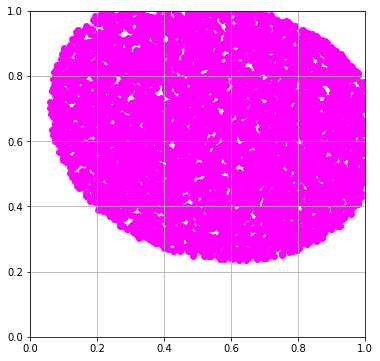

In [100]:
n = 4
a = .5
g,s = ensalea(n,a,1)

###  4.

In [101]:
def echant(l,g,s):
    x = np.random.uniform(0,1,(l,2))
    y = (f(x,g,s) > 1/2)*1*2 -1
    return x,y

###  5.

In [104]:
def estens(x,y,p):
    X1 = x[:,0]
    X2 = x[:,1]
    Lm = np.zeros((p,p))
    Lp = np.zeros((p,p))
    l = len(X1)
    for k in range(l):
        i = int(p * X1[k])
        j = int(p * X2[k])
        Lm[i,j] += (y[k] == -1)*1
        Lp[i,j] += (y[k] == 1)*1
    B = (Lp > Lm) * 1
    return B

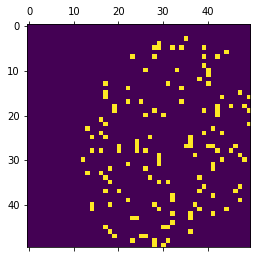

In [105]:
l = 200
p = 50
x,y = echant(l,g,s)
B = estens(x,y,p)
plt.matshow(B)